[View in Colaboratory](https://colab.research.google.com/github/Shreyas3108/Weather/blob/master/usinggetdumm.ipynb)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
#% matplotlib inline 
import seaborn as sns ; sns.set()
import sklearn

In [2]:
''' 1. Data Cleaning'''
data = pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacman Data Science\\Project\\Project VII/weatherAUS.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
data.shape

(145460, 23)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
data = data.dropna()

data.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)



In [9]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [10]:
data['Date'].isnull().sum()

0

In [11]:
data['Date']=pd.to_datetime(data['Date'])

In [12]:
numeric_col=data.select_dtypes(include=np.number).columns.tolist()

In [13]:
cate_col=data.select_dtypes(include='object').columns.tolist()

In [14]:
print(numeric_col)
print("-"*50)
print(cate_col)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
--------------------------------------------------
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
data[cate_col].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [16]:
for col in data[cate_col]:
    print(col)
    print("-"*50)
    print(data[col].value_counts())

Location
--------------------------------------------------
Location
Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: count, dtype: int64
WindGustDir
--------------------------------------------------
WindGustDir
E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516


In [17]:
data[numeric_col].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6


In [18]:
data[numeric_col].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [19]:
data[numeric_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,56420.0,13.464770,6.416689,-6.7,8.6,13.2,18.4,31.4
MaxTemp,56420.0,24.219206,6.970676,4.1,18.7,23.9,29.7,48.1
Rainfall,56420.0,2.130397,7.014822,0.0,0.0,0.0,0.6,206.2
Evaporation,56420.0,5.503135,3.696282,0.0,2.8,5.0,7.4,81.2
Sunshine,56420.0,7.735626,3.758153,0.0,5.0,8.6,10.7,14.5
WindGustSpeed,56420.0,40.877366,13.335232,9.0,31.0,39.0,48.0,124.0
WindSpeed9am,56420.0,15.667228,8.317005,2.0,9.0,15.0,20.0,67.0
WindSpeed3pm,56420.0,19.786778,8.510180,2.0,13.0,19.0,26.0,76.0
Humidity9am,56420.0,65.874123,18.513289,0.0,55.0,67.0,79.0,100.0
Humidity3pm,56420.0,49.601985,20.197040,0.0,35.0,50.0,63.0,100.0


In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imputer=SimpleImputer(strategy='mean')

In [22]:
imputer.fit(data[numeric_col])

SimpleImputer()

In [23]:
imputer_stats=list(imputer.statistics_)
print(imputer_stats)

[13.464769585253457, 24.219205955334985, 2.1303970223325064, 5.503135412974123, 7.735625664657924, 40.877366182204895, 15.667227933356966, 19.78677773839064, 65.87412265154201, 49.60198511166253, 1017.2395054945055, 1014.7955795817085, 4.241705069124424, 4.326515420063807, 18.2049610067352, 22.710333215171925]


In [24]:
imputer.transform(data[numeric_col])

array([[17.9, 35.2,  0. , ...,  5. , 26.6, 33.4],
       [18.4, 28.9,  0. , ...,  1. , 20.3, 27. ],
       [19.4, 37.6,  0. , ...,  6. , 28.7, 34.9],
       ...,
       [20.7, 32.8,  0. , ...,  0. , 24.8, 32.1],
       [19.5, 31.8,  0. , ...,  1. , 24.8, 29.2],
       [20.2, 31.7,  0. , ...,  5. , 25.4, 31. ]])

In [25]:
data[numeric_col]= imputer.transform(data[numeric_col])

In [26]:
data[numeric_col].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [27]:
''' 2.Exploratory Data Analysis'''

' 2.Exploratory Data Analysis'

In [28]:
#!pip install plotly matplotlib seaborn --quiet
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
sns.set_style('dark')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = 'White'

In [30]:
px.histogram(data,x='Location', title='Location Vs rainDays', color='RainToday')

In [31]:
rainposibilities =data['RainTomorrow'].value_counts()

In [32]:
px.bar(data_frame=rainposibilities, x=rainposibilities.index, y=rainposibilities.values )

In [33]:
paper= plt.figure(figsize=(4,4))
px.pie(data_frame=rainposibilities, names=rainposibilities.index ,values=rainposibilities.values, )

<Figure size 400x400 with 0 Axes>

<Axes: title={'center': 'Histogram of Min temp'}, ylabel='Frequency'>

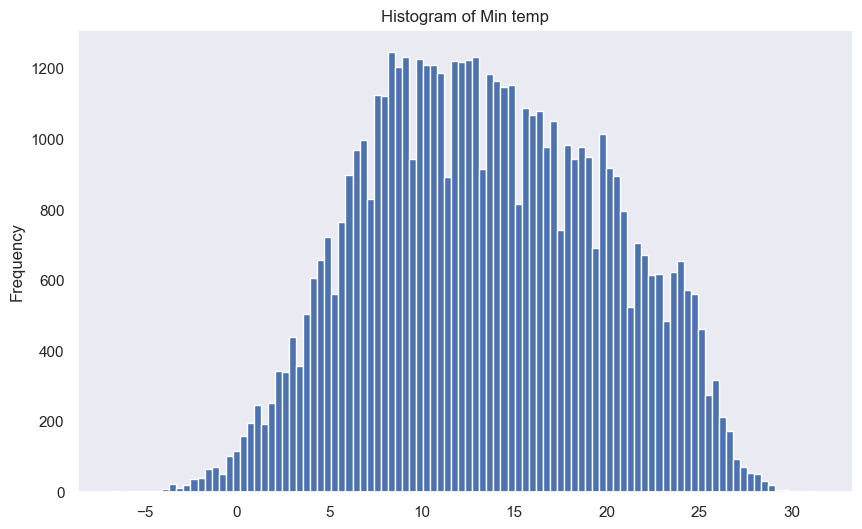

In [34]:
data['MinTemp'].plot(
    kind='hist',
    bins=100,
    
    title='Histogram of Min temp')

In [35]:
px.histogram(data,x='WindDir9am', title='Min temp with RainTomorrow', color='RainTomorrow')

In [36]:
px.histogram(data,x='WindGustDir', title='Min temp with RainTomorrow', color='WindGustDir')

In [37]:
px.scatter(data.sample(2000),
          title='Min Temp vs Max temp',
          x='MinTemp',
          y='MaxTemp',
          color='RainToday')

In [38]:
px.scatter(data.sample(2000),
          title='Min Temp vs Max temp',
          x='Location',
          y='WindDir9am',
          color='RainToday')

In [39]:
px.scatter(data.sample(2000),
          title='Min Temp vs Max temp',
          x='Location',
          y='Evaporation',
          color='RainToday')

In [40]:
px.scatter(data.sample(2000),x='Evaporation', title='Rainfall with RainTomorrow', color='RainTomorrow')

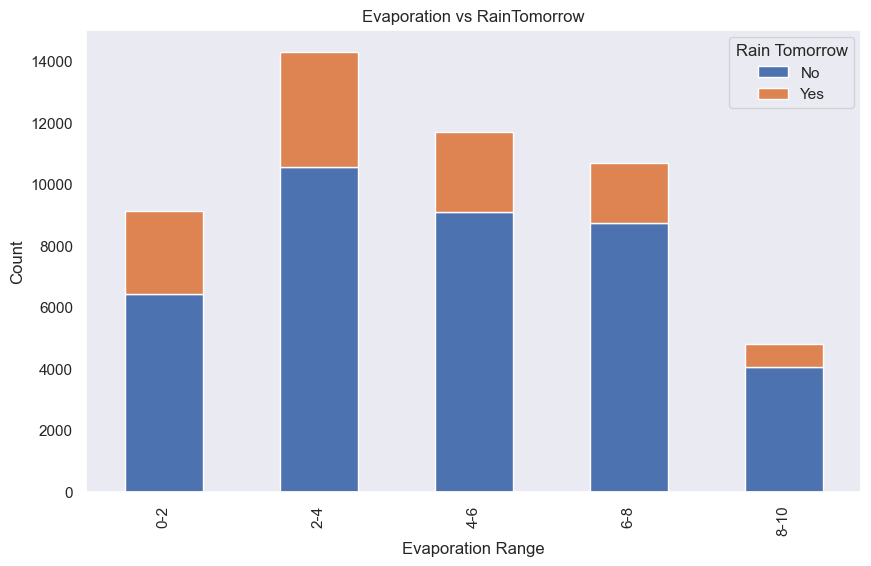

In [41]:
# Define bins for evaporation ranges
bins = [0, 2, 4, 6, 8, 10]

# Add a new column 'EvapRange' to categorize evaporation values
data['Evaporation'] = pd.cut(data['Evaporation'], bins=bins, labels=['0-2', '2-4', '4-6', '6-8', '8-10'])

# Create a cross-tabulation table to count occurrences
cross_tab = pd.crosstab(data['Evaporation'], data['RainTomorrow'])

# Plot the bar plot
cross_tab.plot(kind='bar', stacked=True)
plt.title('Evaporation vs RainTomorrow')
plt.xlabel('Evaporation Range')
plt.ylabel('Count')
plt.legend(title='Rain Tomorrow')

plt.show()

In [42]:
px.scatter(data.sample(2000),x='Sunshine', title='Rainfall with RainTomorrow', color='RainTomorrow')

In [43]:
data['RainTomorrow']= data['RainTomorrow'].replace(['No', 'Yes'], [0, 1])

In [44]:
data['RainToday']= data['RainToday'].replace(['No', 'Yes'], [0, 1])

In [45]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,NaN,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,NaN,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,NaN,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,NaN,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,NaN,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0


In [46]:
# Function to preprocess the values
def preprocess_evaporation(value):
    if isinstance(value, str):
        # For range values, split and calculate average
        range_values = value.split('-')
        return (float(range_values[0]) + float(range_values[1])) / 2
    else:
        # For numerical values, return as-is
        return float(value)

# Apply the preprocessing function to the column
data['Evaporation'] = data['Evaporation'].apply(preprocess_evaporation)

In [47]:
data['Evaporation']=data['Evaporation'].astype(float)

In [48]:
mean = data['Evaporation'].mean()
data['Evaporation'].fillna(mean, inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           56420 non-null  datetime64[ns]
 1   Location       56420 non-null  object        
 2   MinTemp        56420 non-null  float64       
 3   MaxTemp        56420 non-null  float64       
 4   Rainfall       56420 non-null  float64       
 5   Evaporation    56420 non-null  float64       
 6   Sunshine       56420 non-null  float64       
 7   WindGustDir    56420 non-null  object        
 8   WindGustSpeed  56420 non-null  float64       
 9   WindDir9am     56420 non-null  object        
 10  WindDir3pm     56420 non-null  object        
 11  WindSpeed9am   56420 non-null  float64       
 12  WindSpeed3pm   56420 non-null  float64       
 13  Humidity9am    56420 non-null  float64       
 14  Humidity3pm    56420 non-null  float64       
 15  Pressure9am    56420

In [50]:
data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [51]:
data[numeric_col].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.749687,0.110800,0.483710,0.076087,0.118054,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222
MaxTemp,0.749687,1.000000,-0.069981,0.560306,0.463913,0.035531,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841
Rainfall,0.110800,-0.069981,1.000000,-0.068636,-0.246379,0.106308,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627
Evaporation,0.483710,0.560306,-0.068636,1.000000,0.339536,0.143429,0.109662,0.147569,-0.406358,-0.273455,-0.266805,-0.296790,-0.142124,-0.180215,0.554498,0.543601
Sunshine,0.076087,0.463913,-0.246379,0.339536,1.000000,-0.052422,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129
WindGustSpeed,0.118054,0.035531,0.106308,0.143429,-0.052422,1.000000,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382
WindSpeed9am,0.108522,-0.008171,0.050584,0.109662,-0.013842,0.608852,1.000000,0.502226,-0.236795,-0.058449,-0.201518,-0.155484,0.034908,0.062507,0.053749,-0.018357
WindSpeed3pm,0.137273,0.012266,0.044112,0.147569,0.029200,0.685236,0.502226,1.000000,-0.100626,0.031843,-0.293155,-0.252095,0.068224,0.041475,0.114043,-0.009436
Humidity9am,-0.174991,-0.495781,0.263625,-0.406358,-0.500343,-0.193410,-0.236795,-0.100626,1.000000,0.685697,0.114575,0.172972,0.438962,0.348707,-0.423598,-0.487758
Humidity3pm,0.070827,-0.448116,0.277625,-0.273455,-0.629299,-0.042653,-0.058449,0.031843,0.685697,1.000000,-0.063454,0.024109,0.509223,0.510996,-0.151614,-0.497245


<Axes: >

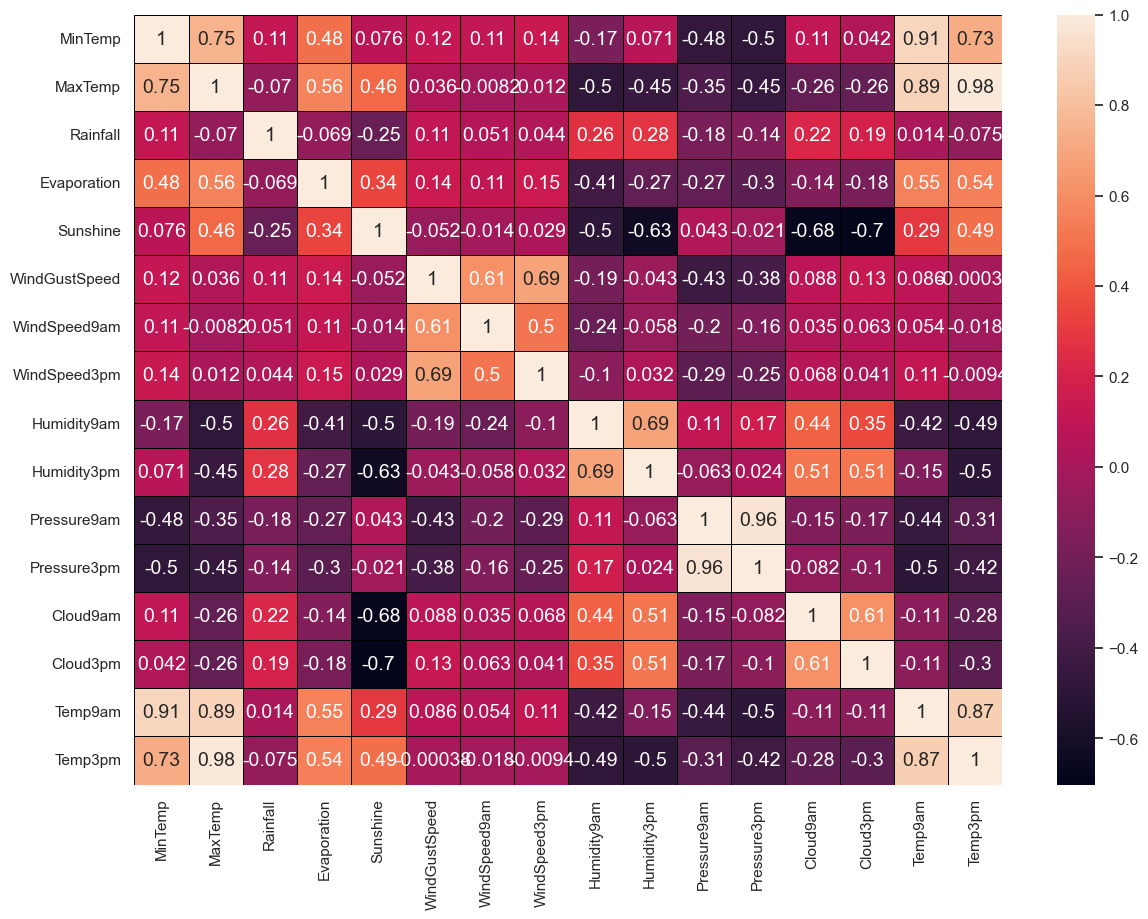

In [52]:
paper=plt.figure(figsize=(14,10))
sns.heatmap(data[numeric_col].corr(), annot=True, fmt='.2g',linewidth=0.5, linecolor='Black')

In [53]:
# Calculate the correlation matrix
corr_matrix = data[numeric_col].corr()

# Find pairs of features with positive correlation greater than 0.30
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        correlation = corr_matrix.iloc[i, j]
        if correlation > 0.30:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], correlation))

print("Pairs of features with positive correlation > 0.30:")
for feature1, feature2, correlation in high_corr_features:
    print(f"{feature1} - {feature2}: {correlation}")

Pairs of features with positive correlation > 0.30:
MinTemp - MaxTemp: 0.74968725006187
MinTemp - Evaporation: 0.48370983650448873
MinTemp - Temp9am: 0.9062947809969243
MinTemp - Temp3pm: 0.7272220532100605
MaxTemp - Evaporation: 0.5603057874066368
MaxTemp - Sunshine: 0.46391279450932077
MaxTemp - Temp9am: 0.8933869518819971
MaxTemp - Temp3pm: 0.9848414081018141
Evaporation - Sunshine: 0.3395363249351099
Evaporation - Temp9am: 0.5544981708383894
Evaporation - Temp3pm: 0.5436010317500087
Sunshine - Temp3pm: 0.4861289657005702
WindGustSpeed - WindSpeed9am: 0.6088518372528908
WindGustSpeed - WindSpeed3pm: 0.6852363743295763
WindSpeed9am - WindSpeed3pm: 0.5022263737692769
Humidity9am - Humidity3pm: 0.6856969247641806
Humidity9am - Cloud9am: 0.43896228172093
Humidity9am - Cloud3pm: 0.34870702487545746
Humidity3pm - Cloud9am: 0.5092229901379068
Humidity3pm - Cloud3pm: 0.5109960795626295
Pressure9am - Pressure3pm: 0.961538322269745
Cloud9am - Cloud3pm: 0.6143804777488254
Temp9am - Temp3pm: 0.

In [54]:
# Create a scatter plot using Plotly Express
scatter_plot = px.scatter(data.sample(2000), x='Temp3pm', y='Temp9am', 
                              color='RainToday',  
                          title='Scatter Plot of Temperature')

# Show the scatter plot
scatter_plot.show()

In [55]:
# Create a scatter plot using Plotly Express
scatter_plot = px.scatter(data.sample(2000), x='Rainfall', y='RainToday', 
                          color='RainTomorrow',  
                          title='Scatter Plot of Temperature')

# Show the scatter plot
scatter_plot.show()

In [56]:
data.to_csv('WeatherUpdated.csv')

backup=pd.DataFrame(data)
backup.sample()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
66596,2015-10-31,MelbourneAirport,14.0,25.9,3.0,9.0,5.0,N,78.0,SW,...,94.0,51.0,1015.3,1010.8,8.0,6.0,15.0,24.4,1,1


In [57]:
data=pd.read_csv(r'C:\\Users\\PPL2\\Documents\\Private\\Model\\Pacman Data Science\\Project\\Project VII/WeatherUpdated.csv')

In [58]:
data.isnull().sum()

Unnamed: 0       0
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [59]:
data=data.drop('Unnamed: 0', axis=1)

In [60]:
cate_col= ['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',]

In [61]:
data[cate_col]

,Location,WindGustDir,WindDir9am,WindDir3pm
0,Cobar,SSW,ENE,SW
1,Cobar,S,SSE,SSE
2,Cobar,NNE,NNE,NNW
3,Cobar,WNW,WNW,WSW
4,Cobar,WNW,NW,WNW
...,...,...,...,...
56415,Darwin,ENE,SE,NE
56416,Darwin,E,SE,SE
56417,Darwin,E,E,W
56418,Darwin,ESE,SE,NNW


In [62]:
data[cate_col].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
dtype: int64

In [63]:
from sklearn.preprocessing import OneHotEncoder

In [64]:
encoder= OneHotEncoder(sparse=False, handle_unknown ='ignore' )

In [65]:


encoder.fit(data[cate_col])



C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



OneHotEncoder(handle_unknown='ignore', sparse=False, sparse_output=False)

In [66]:


encoder.categories_



[array(['AliceSprings', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Darwin', 'Hobart', 'Melbourne',
        'MelbourneAirport', 'Mildura', 'Moree', 'MountGambier',
        'NorfolkIsland', 'Nuriootpa', 'Perth', 'PerthAirport', 'Portland',
        'Sale', 'Sydney', 'SydneyAirport', 'Townsville', 'WaggaWagga',
        'Watsonia', 'Williamtown', 'Woomera'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)]

In [67]:


encoded_cols=list(encoder.get_feature_names_out(cate_col))
print(encoded_cols)



['Location_AliceSprings', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin', 'Location_Hobart', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown', 'Location_Woomera', 'WindGustDir_E', 'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW', 'Wi

In [68]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [69]:
data[encoded_cols] = encoder.transform(data[cate_col])

In [70]:
pd.set_option('display.max_columns', None)

In [71]:
data.shape

(56420, 97)

In [72]:
data=data.drop(columns=(cate_col))

In [73]:
data.shape

(56420, 93)

In [74]:
data = data.reset_index(drop=True)

In [75]:
data.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,2009-01-01,17.9,35.2,0.0,4.517199,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2009-01-02,18.4,28.9,0.0,4.517199,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2009-01-04,19.4,37.6,0.0,4.517199,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009-01-05,21.9,38.4,0.0,4.517199,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2009-01-06,24.2,41.0,0.0,4.517199,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
train_val_df, test_df = train_test_split(data, test_size = 0.2, random_state=42)

In [78]:
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state=42)

In [79]:
print("test_df",test_df.shape)
print("train_df",train_df.shape)
print("val_df",val_df.shape)

test_df (11284, 93)
train_df (33852, 93)
val_df (11284, 93)


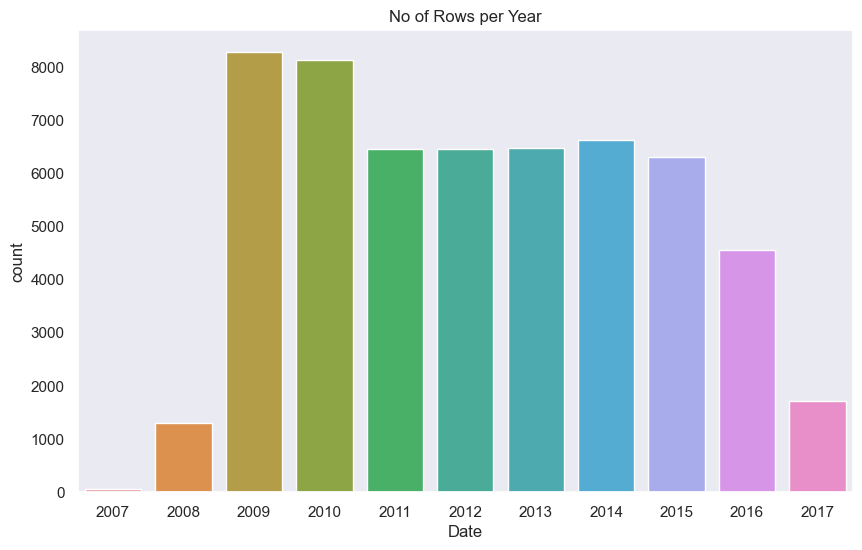

In [80]:
data['Date'] = pd.to_datetime(data['Date'])
plt.title('No of Rows per Year')
sns.countplot(x=data['Date'].dt.year)
plt.show()

In [81]:
year=data['Date'].dt.year
train_df = data[year < 2015]
val_df = data[year == 2015]
test_df = data[year > 2015]

In [82]:
print("test_df",test_df.shape)
print("train_df",train_df.shape)
print("val_df",val_df.shape)

test_df (6280, 93)
train_df (43821, 93)
val_df (6319, 93)


In [83]:
train_df=train_df.drop(columns='Date')
val_df=val_df.drop(columns='Date')
test_df=test_df.drop(columns='Date')

In [84]:
print("test_df",test_df.shape)
print("train_df",train_df.shape)
print("val_df",val_df.shape)
train_df.head()

test_df (6280, 92)
train_df (43821, 92)
val_df (6319, 92)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,17.9,35.2,0.0,4.517199,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,18.4,28.9,0.0,4.517199,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,19.4,37.6,0.0,4.517199,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.9,38.4,0.0,4.517199,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24.2,41.0,0.0,4.517199,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [85]:
train_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,17.9,35.2,0.0,4.517199,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,18.4,28.9,0.0,4.517199,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,19.4,37.6,0.0,4.517199,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21.9,38.4,0.0,4.517199,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,24.2,41.0,0.0,4.517199,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
print(train_df.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Location_AliceSprings', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Darwin', 'Location_Hobart', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_WaggaWagga', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Woomera', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
 

In [87]:
backup1=data.copy()

In [88]:
input_col=data.columns[~data.columns.isin(['Date', 'RainTomorrow'])]
data[input_col].head(1)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_NorfolkIsland,Location_Nuriootpa,Location_Perth,Location_PerthAirport,Location_Portland,Location_Sale,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_WaggaWagga,Location_Watsonia,Location_Williamtown,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,17.9,35.2,0.0,4.517199,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [89]:
target_col = 'RainTomorrow'
target_col

'RainTomorrow'

In [90]:
print(input_col)
print("\n---------------------------------------------------------------")
print(target_col)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Location_AliceSprings',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Hobart', 'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_Mildura', 'Location_Moree', 'Location_MountGambier',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Sale',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE'

In [91]:
print("test_df",test_df.shape)
print("train_df",train_df.shape)
print("val_df",val_df.shape)

test_df (6280, 92)
train_df (43821, 92)
val_df (6319, 92)


In [92]:
train_inputs = train_df[input_col].copy()
train_targets = train_df[target_col].copy()

In [93]:
val_inputs = val_df[input_col].copy()
val_targets = val_df[target_col].copy()

In [94]:
test_inputs = test_df[input_col].copy()
test_targets = test_df[target_col].copy()

In [95]:
print("train_inputs",train_inputs.shape)
print("train_targets",train_targets.shape)
print("val_inputs",val_inputs.shape)
print("val_targets",val_targets.shape)
print("test_inputs",test_inputs.shape)
print("test_targets",test_targets.shape)

train_inputs (43821, 91)
train_targets (43821,)
val_inputs (6319, 91)
val_targets (6319,)
test_inputs (6280, 91)
test_targets (6280,)


In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
model=LogisticRegression(solver='liblinear')

In [98]:
model.fit(train_inputs,train_targets)

LogisticRegression(solver='liblinear')

In [99]:
model_coef=model.coef_

In [100]:
reshaped_array = model_coef.reshape(-1, 1)
reshaped_array

array([[-0.01361279],
       [ 0.00647124],
       [ 0.01448377],
       [ 0.02175829],
       [-0.14646075],
       [ 0.06843321],
       [-0.00994216],
       [-0.02115043],
       [ 0.00626973],
       [ 0.05942847],
       [ 0.16530912],
       [-0.17368491],
       [-0.01714189],
       [ 0.11764165],
       [ 0.0420503 ],
       [ 0.00636403],
       [ 0.42072217],
       [-0.00928091],
       [ 0.52363914],
       [ 0.15840192],
       [ 0.05604267],
       [-0.02752543],
       [ 0.12078101],
       [-0.38463967],
       [-0.24591629],
       [-0.09924345],
       [-0.41418986],
       [ 0.13856233],
       [-0.04473283],
       [ 0.20030194],
       [-0.31942859],
       [-0.04678271],
       [ 0.70220046],
       [ 0.38825923],
       [ 0.21123973],
       [-0.37140294],
       [ 0.02805837],
       [-0.17220896],
       [-0.55479734],
       [ 0.28858781],
       [-0.07224631],
       [ 0.08810095],
       [-0.05099751],
       [-0.14954987],
       [-0.18869178],
       [-0

In [101]:
train_input_col_coef=train_inputs.columns
train_input_col_coef

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Location_AliceSprings',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Hobart', 'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_Mildura', 'Location_Moree', 'Location_MountGambier',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Sale',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE'

In [102]:
coef_df=pd.DataFrame(train_input_col_coef)
coef_df['model_coef']= reshaped_array

In [103]:
train_input_col_coef=train_inputs.columns
train_input_col_coef

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'Location_AliceSprings',
       'Location_Brisbane', 'Location_Cairns', 'Location_Canberra',
       'Location_Cobar', 'Location_CoffsHarbour', 'Location_Darwin',
       'Location_Hobart', 'Location_Melbourne', 'Location_MelbourneAirport',
       'Location_Mildura', 'Location_Moree', 'Location_MountGambier',
       'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_Perth',
       'Location_PerthAirport', 'Location_Portland', 'Location_Sale',
       'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville',
       'Location_WaggaWagga', 'Location_Watsonia', 'Location_Williamtown',
       'Location_Woomera', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE'

In [104]:
coef_df=pd.DataFrame(train_input_col_coef)
coef_df['model_coef']= reshaped_array

<Figure size 1000x5000 with 0 Axes>

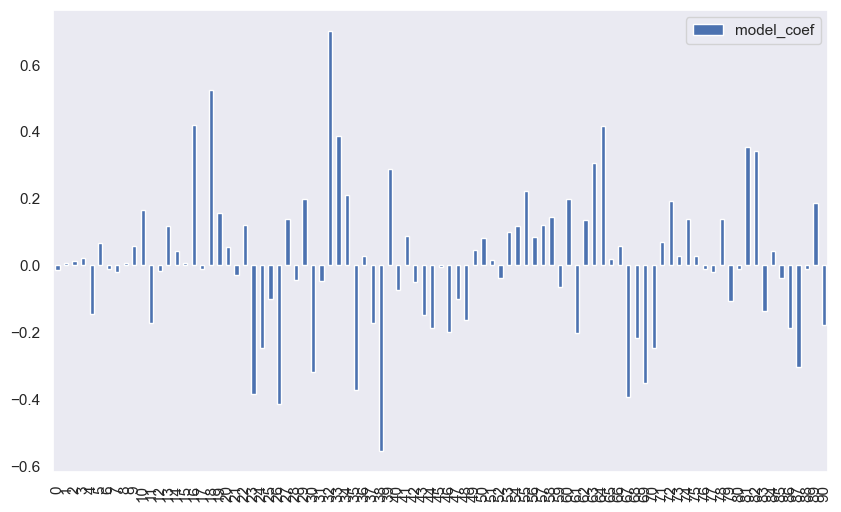

In [105]:
paper=plt.figure(figsize=(10,50))
coef_df.plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

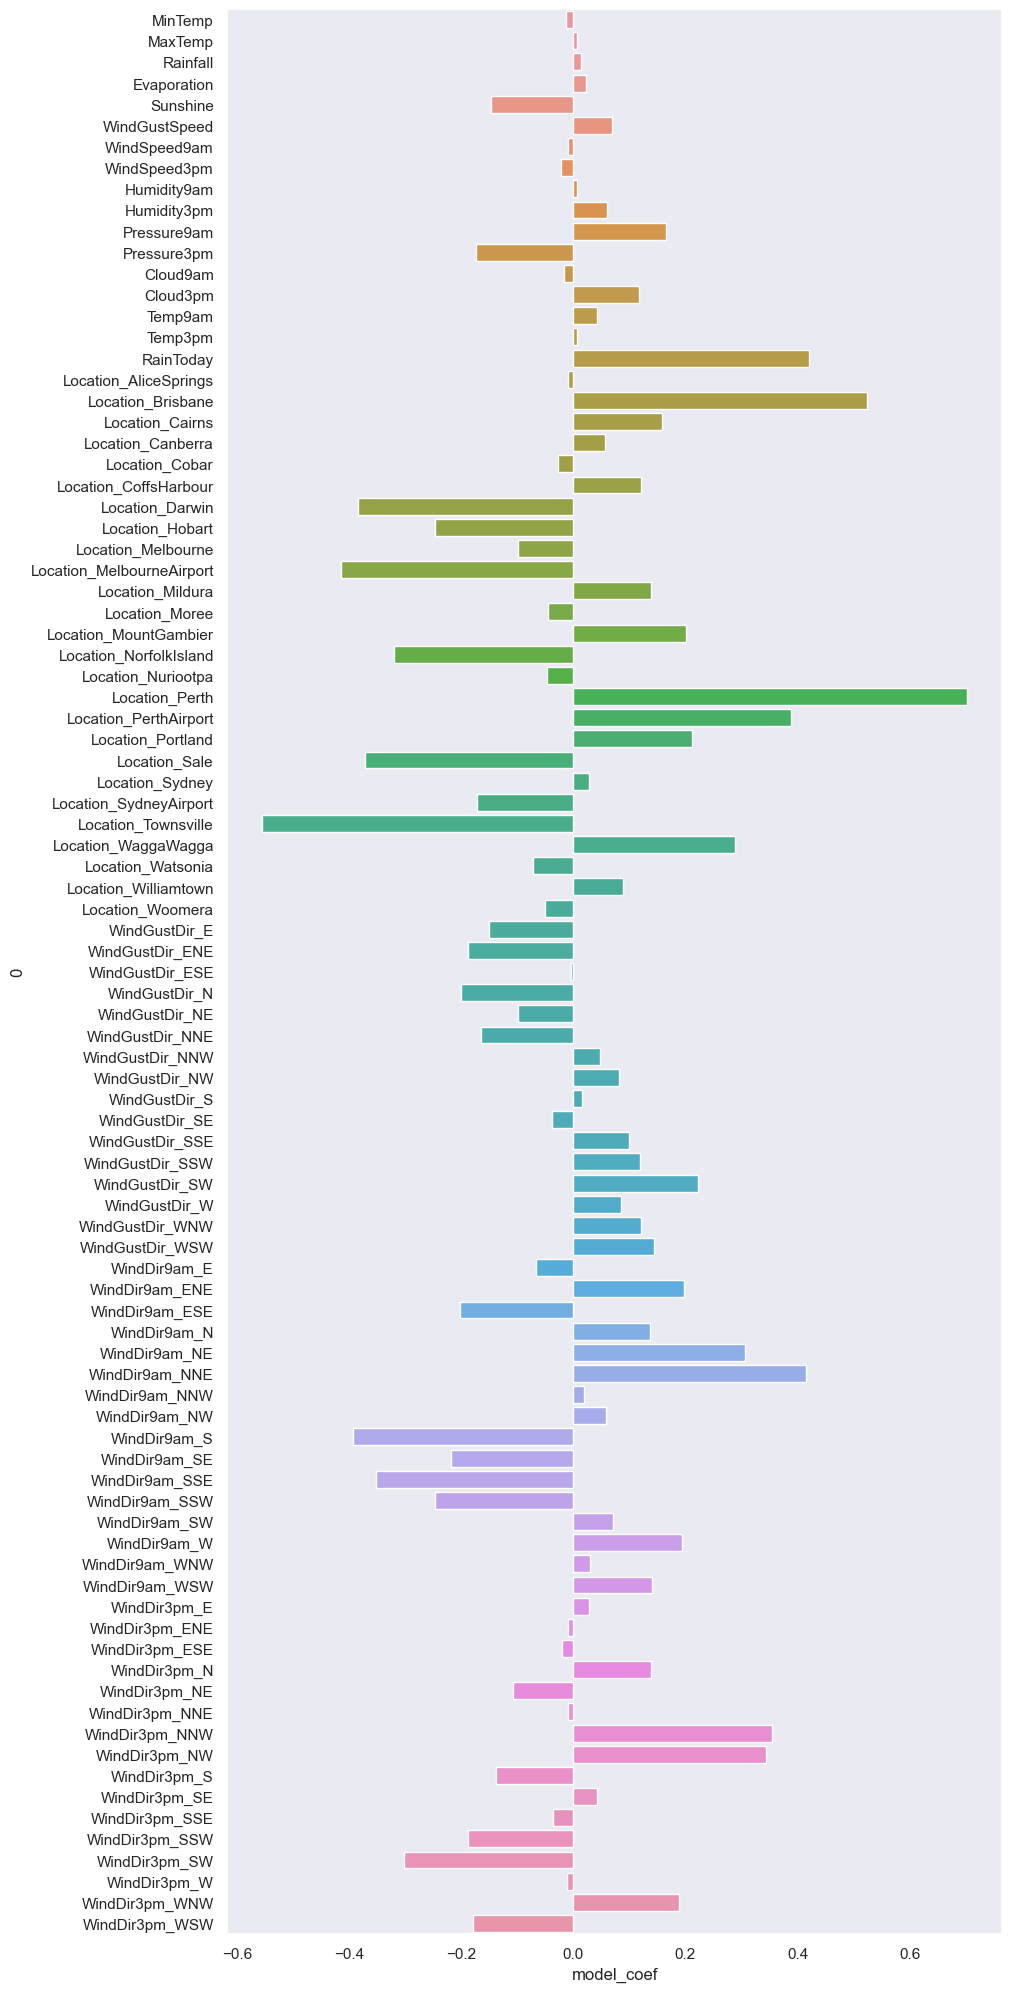

In [106]:
paper=plt.figure(figsize=(10,25))
sns.barplot(data=coef_df,x='model_coef', y=coef_df[0])
#plt.xticks(rotation=90)
plt.show()

In [107]:
top_20_Model_coef=coef_df.sort_values('model_coef',ascending=False).head(20)

In [108]:
top_20_Model_coef.reset_index(drop=True)

,0,model_coef
0,Location_Perth,0.702200
1,Location_Brisbane,0.523639
2,RainToday,0.420722
3,WindDir9am_NNE,0.415867
4,Location_PerthAirport,0.388259
5,WindDir3pm_NNW,0.353949
6,WindDir3pm_NW,0.343075
7,WindDir9am_NE,0.306477
8,Location_WaggaWagga,0.288588
9,WindGustDir_SW,0.223331


In [109]:
top_20_Model_coef['feature_coef']=top_20_Model_coef[0]

In [110]:
top_20_Model_coef

,0,model_coef,feature_coef
32,Location_Perth,0.702200,Location_Perth
18,Location_Brisbane,0.523639,Location_Brisbane
16,RainToday,0.420722,RainToday
64,WindDir9am_NNE,0.415867,WindDir9am_NNE
33,Location_PerthAirport,0.388259,Location_PerthAirport
81,WindDir3pm_NNW,0.353949,WindDir3pm_NNW
82,WindDir3pm_NW,0.343075,WindDir3pm_NW
63,WindDir9am_NE,0.306477,WindDir9am_NE
39,Location_WaggaWagga,0.288588,Location_WaggaWagga
55,WindGustDir_SW,0.223331,WindGustDir_SW


In [111]:
px.bar(top_20_Model_coef,x='model_coef',y='feature_coef', title='TOP 20 Model Coef with features')

In [112]:
model_intercepts=model.intercept_
model_intercepts

array([0.09078276])

In [113]:
train_predict=model.predict(train_inputs)

In [114]:
train_predict

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [115]:
train_targets

0        0
1        0
2        0
3        0
4        0
        ..
55552    0
55553    0
55554    1
55555    1
55556    1
Name: RainTomorrow, Length: 43821, dtype: int64

In [116]:
train_probs=model.predict_proba(train_inputs)
print(model.classes_)
train_probs

[0 1]


array([[0.98456642, 0.01543358],
       [0.99887914, 0.00112086],
       [0.92589858, 0.07410142],
       ...,
       [0.52857923, 0.47142077],
       [0.75144458, 0.24855542],
       [0.43957583, 0.56042417]])

In [117]:
No_probs=train_probs[:,0]
Yes_probs=train_probs[:,1]
model_probs=pd.DataFrame({'No_probs':No_probs,'Yes_probs':Yes_probs})
model_probs

,No_probs,Yes_probs
0,0.984566,0.015434
1,0.998879,0.001121
2,0.925899,0.074101
3,0.983104,0.016896
4,0.966269,0.033731
...,...,...
43816,0.820924,0.179076
43817,0.793190,0.206810
43818,0.528579,0.471421
43819,0.751445,0.248555


In [118]:
px.histogram(model_probs.head(100),x='No_probs', title='Min temp with RainTomorrow', y='Yes_probs')

In [119]:
train_probs=train_probs.astype(str)

In [120]:
train_probs=pd.DataFrame(train_probs)
train_probs

,0,1
0,0.9845664210239495,0.015433578976050478
1,0.9988791383951215,0.0011208616048784784
2,0.9258985843709835,0.07410141562901656
3,0.9831036844342461,0.016896315565753887
4,0.9662685077531737,0.03373149224682622
...,...,...
43816,0.8209239914596158,0.17907600854038422
43817,0.7931904409864009,0.20680955901359913
43818,0.5285792279413054,0.4714207720586946
43819,0.7514445830011668,0.24855541699883324


In [121]:
from sklearn.metrics import accuracy_score

In [122]:
accurecy_scr=accuracy_score(train_targets,train_predict)
print("Accurecy Score : {:.2f} %".format((accurecy_scr*100)))

Accurecy Score : 85.80 %


In [123]:
import numpy as np
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [152]:
#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)#Membuat Object Logistic Regression
logreg = LogisticRegression()#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(logreg, hyperparameters, cv=10)#Fitting Model
best_model = clf.fit(train_inputs,train_targets)#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])#Prediksi menggunakan model baru
#y_pred = best_model.predict(X_test)#Check performa dari model
#print(classification_report(y_test, y_pred))
#roc_auc_score(y_test, y_pred)

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\PPL2\anaconda3\Lib\site-packages\sk

Best Penalty: l2
Best C: 0.0001


C:\Users\PPL2\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [153]:
model1=LogisticRegression(solver='liblinear',C=0.0001,penalty='l2')

In [154]:
model1.fit(train_inputs,train_targets)

LogisticRegression(C=0.0001, solver='liblinear')

In [155]:
train_predict=model1.predict(train_inputs)

In [156]:
accurecy_scr=accuracy_score(train_targets,train_predict)
print("Accurecy Score : {:.2f} %".format((accurecy_scr*100)))

Accurecy Score : 85.44 %


In [134]:
#mod1 = LogisticRegression(solver='liblinear',C=0.0884,penalty='l2')
model = LogisticRegression(solver='liblinear',C=0.23357214690901212,penalty='l2')

In [135]:
model.fit(train_inputs , train_targets)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [136]:
accurecy_scr=accuracy_score(train_targets,train_predict)
print("Accurecy Score : {:.2f} %".format((accurecy_scr*100)))

Accurecy Score : 85.50 %


C:\Users\PPL2\AppData\Local\Temp\ipykernel_3964\599023342.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




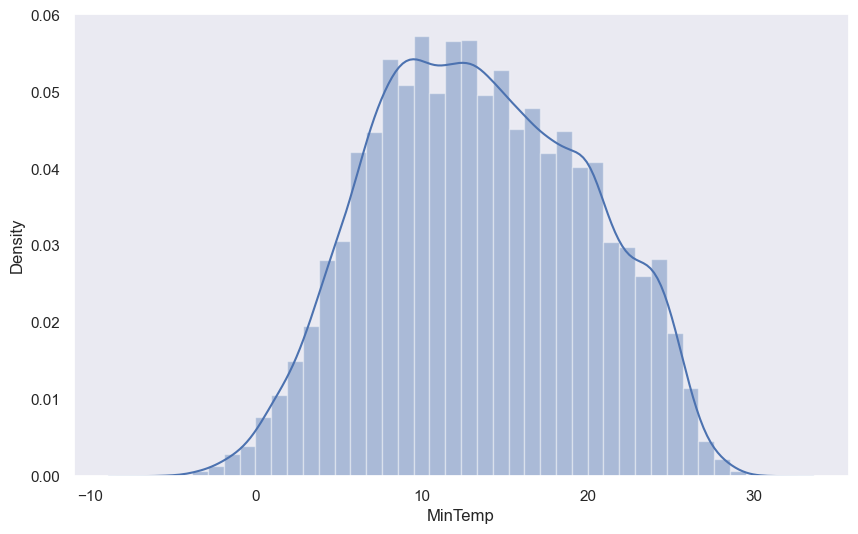

In [137]:
g = sns.distplot(data['MinTemp'],bins = 40)

C:\Users\PPL2\AppData\Local\Temp\ipykernel_3964\571679008.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




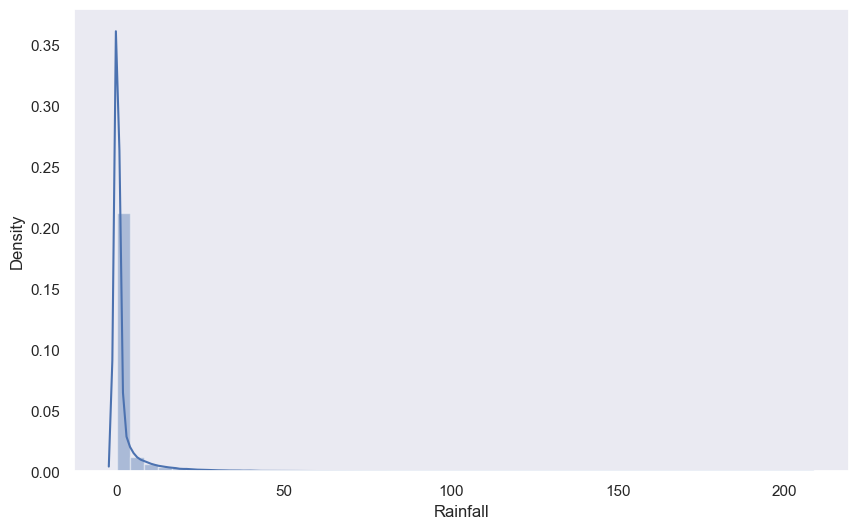

In [138]:
g = sns.distplot(data['Rainfall'])

In [139]:
data.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Location_AliceSprings', 'Location_Brisbane', 'Location_Cairns',
       'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour',
       'Location_Darwin', 'Location_Hobart', 'Location_Melbourne',
       'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree',
       'Location_MountGambier', 'Location_NorfolkIsland', 'Location_Nuriootpa',
       'Location_Perth', 'Location_PerthAirport', 'Location_Portland',
       'Location_Sale', 'Location_Sydney', 'Location_SydneyAirport',
       'Location_Townsville', 'Location_WaggaWagga', 'Location_Watsonia',
       'Location_Williamtown', 'Location_Woomera', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDi

In [140]:
#data['RainToday'] = data['RainToday'].apply(lambda x:1  if x == 'Yes' else 0)
#train  = data[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine',
#             'WindGustDir','WindGustSpeed','WindDir3pm','WindSpeed3pm',
#             'Humidity3pm','Pressure3pm','Cloud3pm','Temp3pm','RainToday',
#             'RISK_MM']]
#data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x : 1 if x == 'Yes' else 0)
#label = data['RainTomorrow']

In [141]:
data['RainToday'] = data['RainToday'].apply(lambda x:1  if x == 'Yes' else 0)
train  = data[['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine',
             'WindGustDir','WindGustSpeed','WindDir3pm','WindSpeed3pm',
             'Humidity3pm','Pressure3pm','Cloud3pm','Temp3pm','RainToday']]
data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x : 1 if x == 'Yes' else 0)
label = data['RainTomorrow']

KeyError: "['WindGustDir', 'WindDir3pm'] not in index"

In [ ]:
train.dtypes 

In [ ]:
train = pd.get_dummies(train , columns= ['WindGustDir','WindDir3pm'])

In [ ]:
train.dtypes

In [ ]:
#from sklearn.cross_validation import train_test_split 
from sklearn.model_selection import train_test_split

In [ ]:
x_train , y_train , x_test , y_test = train_test_split(train , label ,test_size = 0.8)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline

logistic_Reg = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('logistic_Reg', logistic_Reg)])


parameters = dict(logistic_Reg__C=C,
                      logistic_Reg__penalty=penalty)

C = np.logspace(-4, 4, 50)
penalty = ['l1', 'l2']
GridSearchCV(pipe, parameters)


#Fitting Model
best_model = clf.fit(x_train,x_test)#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


In [ ]:
#mod1 = LogisticRegression(solver='liblinear',C=0.0884,penalty='l2')
mod1 = LogisticRegression(solver='liblinear',C=0.23357214690901212,penalty='l2')

In [ ]:
mod1.fit(x_train , x_test)

In [ ]:
accuracy_score(y_test , mod1.predict(y_train))*100

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test , mod1.predict(y_train))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
mod2 = DecisionTreeClassifier()

In [ ]:
mod2.fit(x_train , x_test)

In [ ]:
accuracy_score(y_test , mod2.predict(y_train))*100

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
mod3 = RandomForestClassifier()

In [ ]:
mod3.fit(x_train , x_test)

In [ ]:
accuracy_score(y_test , mod3.predict(y_train))*100